In [54]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [55]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()
print (diabetes_data["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [56]:
# Save the input and target variables
#print(diabetes_data.keys())
input_data = diabetes_data["data"]
test_data = diabetes_data["target"]

In [57]:
# Normalise the target data (this will make clearer training curves)
test_data = (test_data - test_data.mean(axis=0)) / test_data.std()
test_data

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [58]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(input_data, test_data, test_size =0.1)
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [59]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation="relu",input_shape=(train_data.shape[1],)),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(1)
    ])
    return model
model = get_model()

In [60]:
# Print the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_36 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_39 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_40 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                

In [61]:
# Compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [62]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data,train_targets,epochs = 100,
          validation_split=0.15,batch_size=64,verbose=False )

In [63]:
# Evaluate the model on the test set
model.evaluate(test_data,test_targets,verbose=2)

45/1 - 0s - loss: 1.2694 - mae: 0.7716


[1.0445055961608887, 0.77163357]

#### Plot the learning curves

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

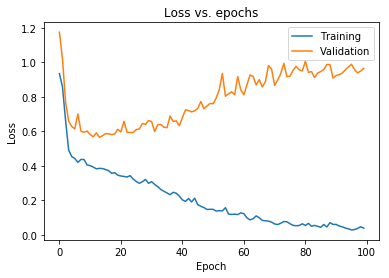

In [65]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [66]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [67]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation="relu", kernel_regularizer = regularizers.l1(wd), input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l1(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l1(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l1(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l1(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l1(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [68]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5, 0.3)

In [69]:
# Compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [70]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100,
          validation_split=0.15, batch_size=65, verbose=False)

In [71]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 1.0351 - mae: 0.6523


[0.8030134095085992, 0.6522904]

#### Plot the learning curves

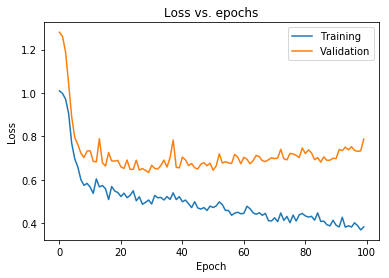

In [72]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [73]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print("Starting Training...")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")
    
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Ending epoch {epoch}")
        
    def on_train_end(self, logs=None):
        print("Finished Training!")
    
class TestingCallback(Callback):
    
    def on_test_begin(self, logs=None):
        print("Starting Testing...")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")
    
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finished batch {batch}")
             
    def on_test_end(self, logs=None):
        print("Finished Testing!")
        
class PredictionCallback(Callback):
        
    def on_predict_begin(self, logs=None):
        print("Starting Prediction...")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
    
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")
        
    def on_predict_end(self, logs=None):
        print("Finished Prediction!")

In [74]:
# Re-build the model
model = get_regularised_model(1e-5, 0.3)

In [75]:
# Compile the model
model.compile(optimizer='adam',loss='mse')

#### Train the model with the callback

In [76]:
# Train the model, with some of the data reserved for validation
model.fit(train_data, train_targets, verbose=False, validation_split=0.1, 
          epochs=100, batch_size = 65, callbacks=[TrainingCallback()])

Starting Training...
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Training: Starting batch 4
Training: Finished batch 4
Training: Starting batch 5
Training: Finished batch 5
Ending epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Training: Starting batch 4
Training: Finished batch 4
Training: Starting batch 5
Training: Finished batch 5
Ending epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Training: Starting batch 4
Trainin

In [77]:
# Evaluate the model
model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

Starting Testing...
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished Testing!


0.8118360810809665

In [78]:
# Make predictions with the model
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()]  )

Starting Prediction...
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished Prediction!


array([[ 1.91045448e-01],
       [-8.73376727e-02],
       [-6.63574636e-01],
       [ 3.42759639e-01],
       [-1.22325765e-02],
       [ 7.95705914e-02],
       [-8.76280546e-01],
       [ 1.34683311e+00],
       [ 1.03566539e+00],
       [ 1.41077268e+00],
       [ 1.19614816e+00],
       [-1.90352768e-01],
       [-8.66679132e-01],
       [-7.57704437e-01],
       [ 1.76185295e-01],
       [ 2.29720190e-01],
       [-1.66031510e-01],
       [-9.90914404e-01],
       [-1.13033772e+00],
       [-6.65044546e-01],
       [ 1.00251877e+00],
       [-1.65473185e-02],
       [ 8.77695024e-01],
       [-1.17550850e+00],
       [ 6.00517690e-01],
       [ 1.31694567e+00],
       [-5.39964199e-01],
       [-7.62662515e-02],
       [ 1.24568665e+00],
       [ 1.72813267e-01],
       [-1.01138449e+00],
       [-8.28927994e-01],
       [-1.02665007e+00],
       [-3.93083155e-01],
       [-3.19383323e-01],
       [ 1.25824714e+00],
       [-4.51223940e-01],
       [-8.57263565e-01],
       [-9.4

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [93]:
# Re-train the unregularised model
unregularized_model = get_model()
unregularized_model.compile(optimizer='adam', loss='mse')
unreg_history = unregularized_model.fit(train_data, train_targets, epochs=100, validation_split=0.15,
                        batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [94]:
# Evaluate the model on the test set
unregularized_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.8165


0.6997178567780389

In [96]:
# Re-train the regularised model
regularized_model = get_regularised_model(1e-5,0.3)
regularized_model.compile(optimizer='adam', loss='mse')
reg_history = regularized_model.fit(train_data, train_targets, epochs=100, validation_split=0.15,
                        batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [97]:
# Evaluate the model on the test set
regularized_model.evaluate(test_data, test_targets, verbose=2)


45/1 - 0s - loss: 0.8054


0.6841289970609877

#### Plot the learning curves

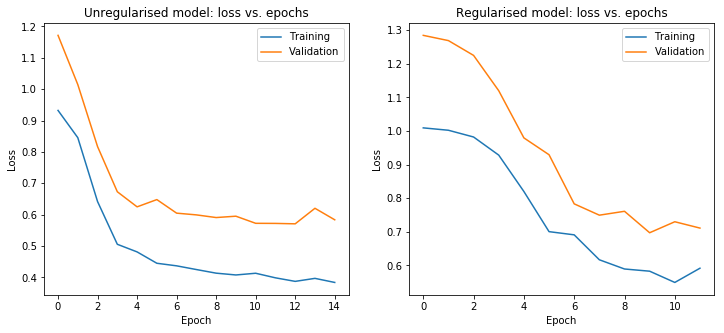

In [98]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()